# Importing Required Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# For clean plots
sns.set(style='whitegrid')

# Loading Dataset

In [ ]:
df = pd.read_csv("..\\Datasets\\sales_data_sample.csv", encoding='latin1')
print(f"Dataset loaded to dataframe df having dimensions {df.shape}")

Dataset loaded to dataframe df having dimensions (2823, 25)


# Exploring Dataset

## Dimension and Size

In [3]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}\nTotal No. of Cells : {df.size}")

No. of Rows : 2823
No. of Columns : 25
Total No. of Cells : 70575


## Displaying Sample Rows

In [4]:
print("Top 5 rows")
display(df.head())

Top 5 rows


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
print("Last 5 rows")
display(df.tail())

Last 5 rows


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [6]:
print("Randomly selected 5 rows")
display(df.sample(5))

Randomly selected 5 rows


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1451,10259,28,46.82,1,1310.96,6/15/2004 0:00,Shipped,2,6,2004,...,Village Close - 106 Linden Road Sandown,2nd Floor,Singapore,NaN,69045,Singapore,APAC,Victorino,Wendy,Small
2210,10276,27,36.61,10,988.47,8/2/2004 0:00,Shipped,3,8,2004,...,7635 Spinnaker Dr.,NaN,Brickhaven,MA,58339,USA,NaN,Barajas,Miguel,Small
551,10419,37,100.00,1,5202.94,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Medium
2743,10106,48,61.44,10,2949.12,2/17/2003 0:00,Shipped,1,2,2003,...,Via Ludovico il Moro 22,NaN,Bergamo,NaN,24100,Italy,EMEA,Rovelli,Giovanni,Small
843,10255,24,100.00,1,3726.00,6/4/2004 0:00,Shipped,2,6,2004,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Medium


## Metadata

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


None

## Statistical Summary

In [8]:
display(df.describe())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# Data Preprocessing

## Handling NULL Values

In [9]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
Total NULL Values : 5157


In [10]:
null_percent = df.isnull().sum() / len(df) * 100
print(null_percent.sort_values(ascending=False))

ADDRESSLINE2        89.302161
STATE               52.639036
TERRITORY           38.044633
POSTALCODE           2.692171
ORDERNUMBER          0.000000
CUSTOMERNAME         0.000000
CONTACTFIRSTNAME     0.000000
CONTACTLASTNAME      0.000000
COUNTRY              0.000000
CITY                 0.000000
ADDRESSLINE1         0.000000
PHONE                0.000000
PRODUCTCODE          0.000000
QUANTITYORDERED      0.000000
MSRP                 0.000000
PRODUCTLINE          0.000000
YEAR_ID              0.000000
MONTH_ID             0.000000
QTR_ID               0.000000
STATUS               0.000000
ORDERDATE            0.000000
SALES                0.000000
ORDERLINENUMBER      0.000000
PRICEEACH            0.000000
DEALSIZE             0.000000
dtype: float64


In [11]:
df.drop(columns=['ADDRESSLINE2','STATE','TERRITORY'], inplace=True)

In [12]:
df['POSTALCODE'] = df['POSTALCODE'].fillna(df['POSTALCODE'].mode()[0])

In [13]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64
Total NULL Values : 0


## Encoding Categorical Columns

In [14]:
cat_cols = ['PRODUCTLINE', 'STATUS', 'DEALSIZE', 'COUNTRY']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## Convert Dates & Extract Features

In [15]:
# df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# # Extract useful numeric features
# df['ORDER_DAY'] = df['ORDERDATE'].dt.day
# df['ORDER_MONTH'] = df['ORDERDATE'].dt.month
# df['ORDER_YEAR'] = df['ORDERDATE'].dt.year
# df['ORDER_WEEKDAY'] = df['ORDERDATE'].dt.weekday

## Drop Irrelevant Columns

In [16]:
drop_cols = [
    'ORDERNUMBER', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
    'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERDATE', 'CITY',
    'ORDERLINENUMBER', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 
    'MSRP', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'
]
df.drop(columns=drop_cols, inplace=True)

print("Remaining columns for clustering:")
print(df.columns)

Remaining columns for clustering:
Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES'], dtype='object')


# EDA

## Distribution of Numeric Features

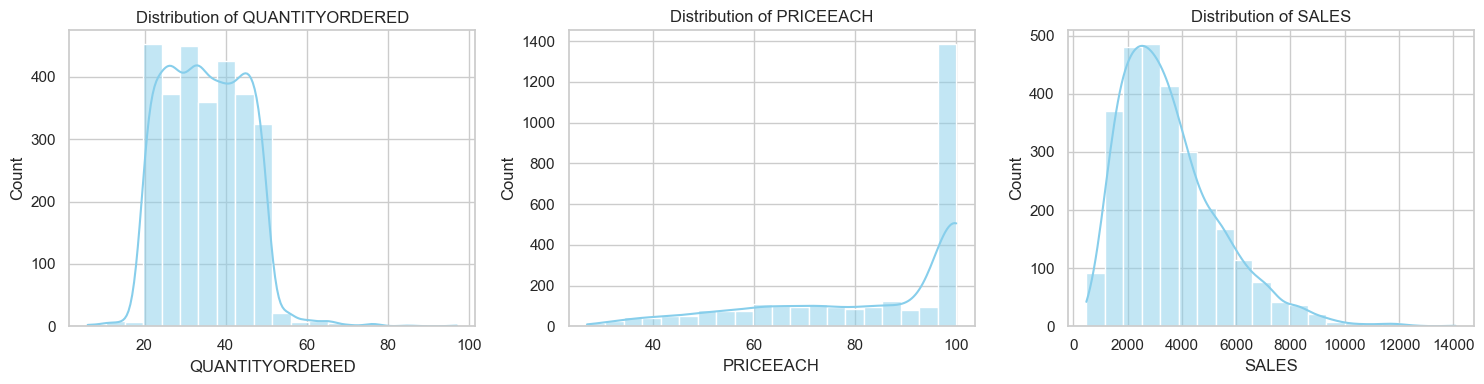

In [17]:
numeric_cols = df.select_dtypes(include=np.number).columns

n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)  # 3 plots per row

plt.figure(figsize=(15, n_rows*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Correlation HeatMap

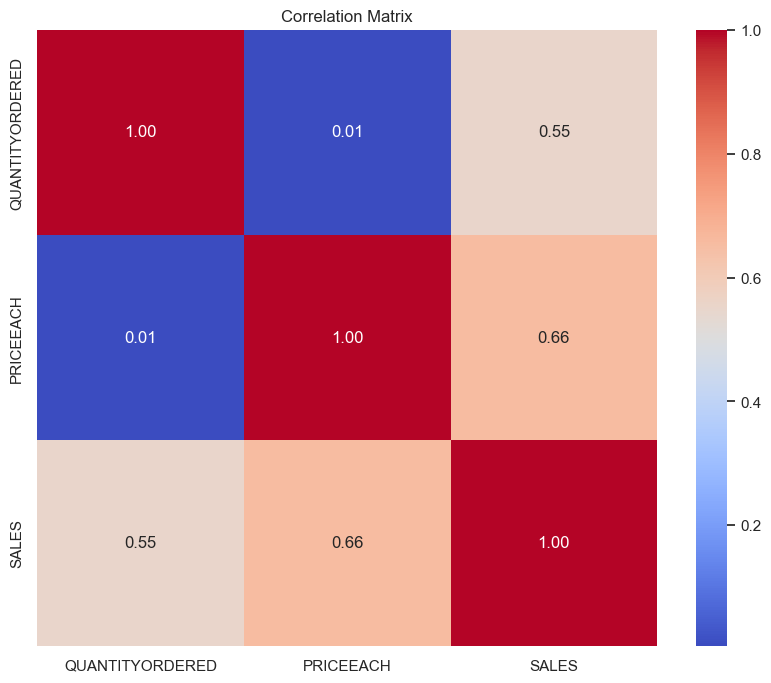

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Scaling

In [19]:
X = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Optimal k (Elbow + Silhouette)

C:\Users\Karunya\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Karunya\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Karunya\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Karunya\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Karunya\anaconda3\Lib\subprocess.py", line 1538, in _execut

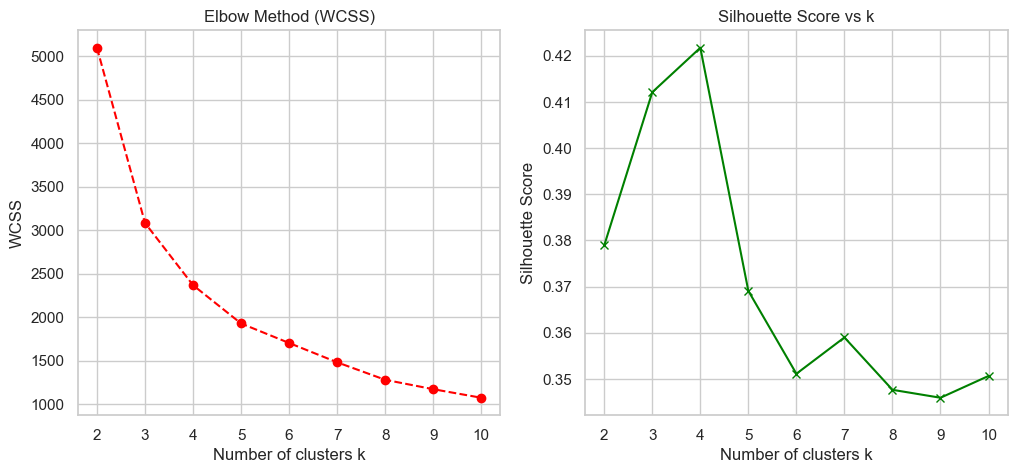

Optimal number of clusters (highest silhouette score): k = 4


In [20]:
wcss = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot WCSS and Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,11), wcss, marker='o', linestyle='--', color='red')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(2,11), sil_scores, marker='x', linestyle='-', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

# Determine optimal k based on max silhouette score
optimal_k = range(2,11)[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): k = {optimal_k}")

# K Means Clustering

In [21]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Centroids in original scale
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_cols)
print("KMeans Cluster centroids:\n", centroids)

KMeans Cluster centroids:
    QUANTITYORDERED  PRICEEACH        SALES
0        43.745283  65.340792  2846.326057
1        43.845127  99.089252  5945.238037
2        28.001812  57.234891  1583.316141
3        27.807460  96.497923  3222.885323


# Evaluate K Means

Silhouette Score for KMeans with k=4: 0.4217


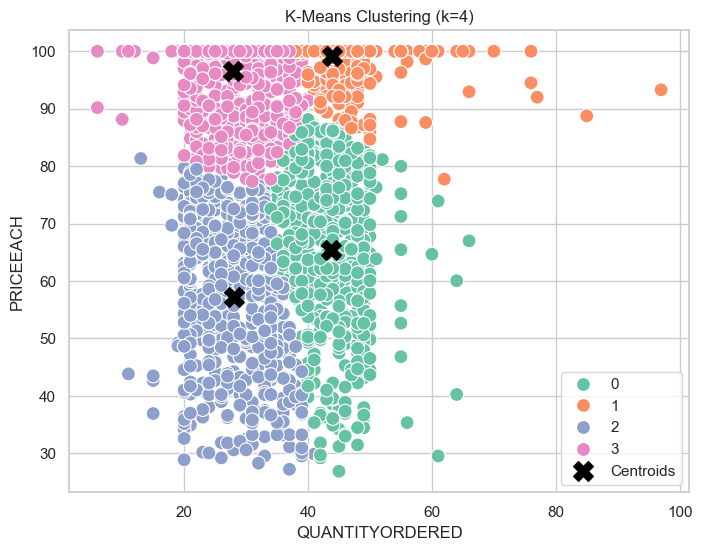

In [22]:
# Silhouette score
sil_score_final = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"Silhouette Score for KMeans with k={optimal_k}: {sil_score_final:.4f}")

# Scatter plot (first two numeric features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]], hue=df['KMeans_Cluster'], palette='Set2', s=100)
plt.scatter(centroids[numeric_cols[0]], centroids[numeric_cols[1]], color='black', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.legend()
plt.show()

Silhouette Score for KMeans with k=4: 0.4217


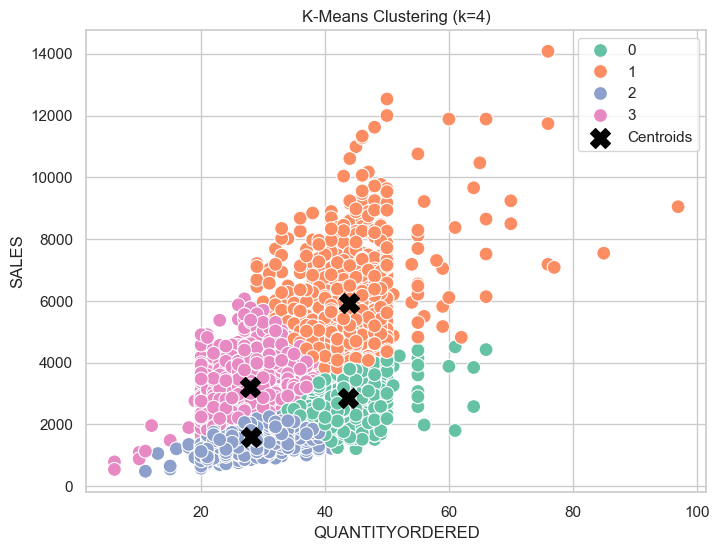

In [26]:
# Silhouette score
sil_score_final = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"Silhouette Score for KMeans with k={optimal_k}: {sil_score_final:.4f}")

# Scatter plot (first two numeric features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[2]], hue=df['KMeans_Cluster'], palette='Set2', s=100)
plt.scatter(centroids[numeric_cols[0]], centroids[numeric_cols[2]], color='black', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[2])
plt.legend()
plt.show()

Silhouette Score for KMeans with k=4: 0.4217


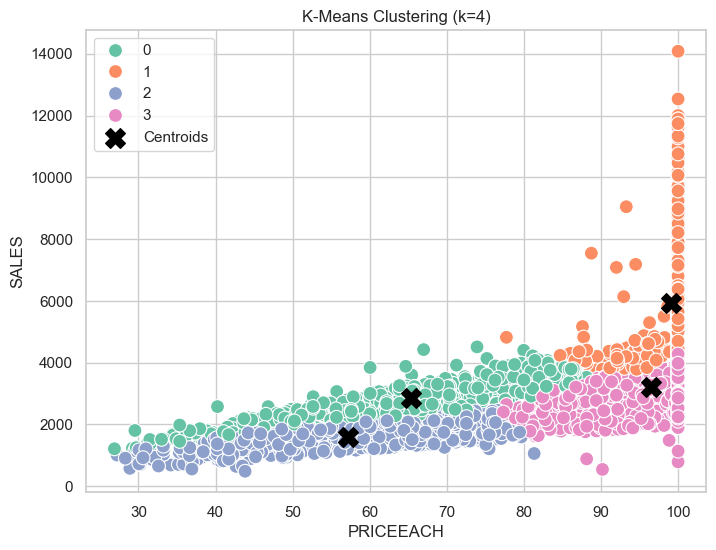

In [27]:
# Silhouette score
sil_score_final = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"Silhouette Score for KMeans with k={optimal_k}: {sil_score_final:.4f}")

# Scatter plot (first two numeric features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[numeric_cols[1]], y=df[numeric_cols[2]], hue=df['KMeans_Cluster'], palette='Set2', s=100)
plt.scatter(centroids[numeric_cols[1]], centroids[numeric_cols[2]], color='black', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel(numeric_cols[1])
plt.ylabel(numeric_cols[2])
plt.legend()
plt.show()

# Hierarchical Clustering

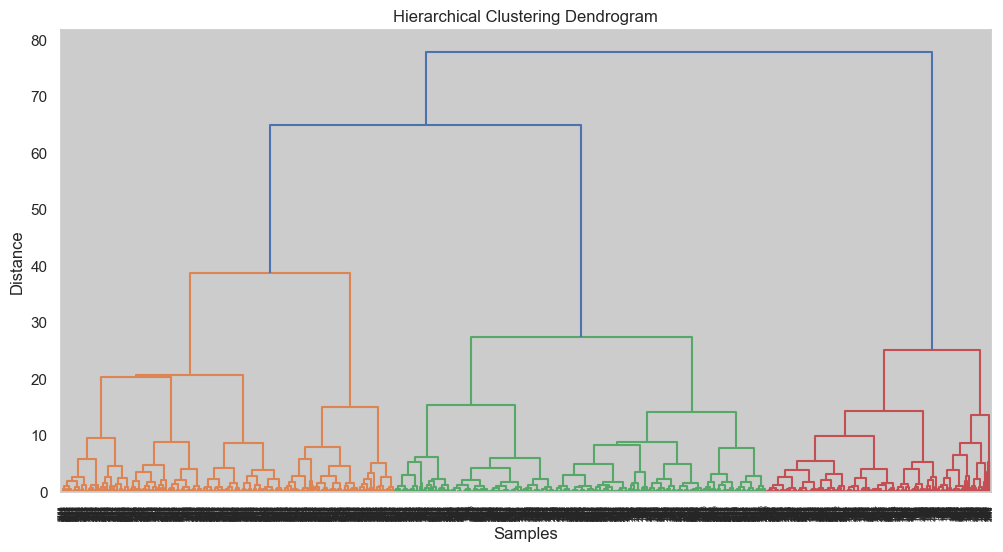

Silhouette Score for Hierarchical Clustering: 0.3854


In [23]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cut tree to get same number of clusters as KMeans
hier_labels = fcluster(linked, t=optimal_k, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

# Silhouette score
sil_score_hier = silhouette_score(X_scaled, hier_labels)
print(f"Silhouette Score for Hierarchical Clustering: {sil_score_hier:.4f}")

# Compare Cluster Count

In [24]:
print("K-Means Cluster Counts:\n", df['KMeans_Cluster'].value_counts())
print("\nHierarchical Cluster Counts:\n", df['Hierarchical_Cluster'].value_counts())

K-Means Cluster Counts:
 KMeans_Cluster
3    992
1    749
2    553
0    529
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hierarchical_Cluster
2    1124
1     685
4     675
3     339
Name: count, dtype: int64


# Cluster Profiling

Cluster Profiles:
                 QUANTITYORDERED  PRICEEACH        SALES
KMeans_Cluster                                         
0                     43.754253  65.380699  2848.445822
1                     43.845127  99.089252  5945.238037
2                     28.021700  57.211374  1583.572297
3                     27.807460  96.497923  3222.885323


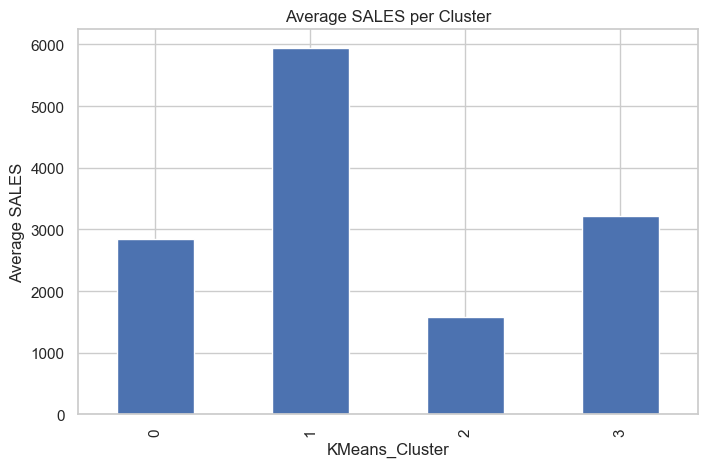

In [25]:
cluster_profile = df.groupby('KMeans_Cluster')[numeric_cols].mean()
print("Cluster Profiles:\n", cluster_profile)

# Bar plot example for SALES
cluster_profile['SALES'].plot(kind='bar', figsize=(8,5), title='Average SALES per Cluster')
plt.ylabel('Average SALES')
plt.show()